In [1]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
from cftime import datetime 
import datetime as dt
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
#jet = mcm.get_cmap('jet')
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import sys
import os
import psutil
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
import time
from time import process_time
from tqdm import tqdm
import dask.array as da
import dask.dataframe as dd
import dask
%matplotlib inline 
import matplotlib.gridspec as gridspec
#import line_profiler
#%load_ext line_profiler

/tmp/ipykernel_190505/2282274303.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


In [2]:
######################
####  W A C C M  #####
######################

In [3]:

win_Monthfolderstr = 'Dec-Feb'
win_ds_months = ['12','01','02']

spr_Monthfolderstr = 'Mar-May'
spr_ds_months = ['03','04','05']

sum_Monthfolderstr = 'Jun-Aug'
sum_ds_months = ['06','07','08']

aut_Monthfolderstr = 'Sep-Nov'
aut_ds_months = ['09','10','11']


#run_name = 'Jianfei_run'
run_name = 'Wuhu_IonTr_run'
#run_name = 'Wuhu_IonTr_run_No_glbavg'

win_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{win_Monthfolderstr}.nc'
spr_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{spr_Monthfolderstr}.nc'
sum_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{sum_Monthfolderstr}.nc'
aut_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{aut_Monthfolderstr}.nc'

ds_months_ar = np.arange(0,3)   

ds_win = xr.open_dataset(win_file)
ds_spr = xr.open_dataset(spr_file)
ds_sum = xr.open_dataset(sum_file)
ds_aut = xr.open_dataset(aut_file)

ds_sum

<xarray.Dataset>
Dimensions:                   (lev_sl: 25, time: 336, lat: 96, latsl: 36,
                               lon: 144, LT: 48, timesl: 2, mth: 3)
Coordinates:
  * lev_sl                    (lev_sl) float64 1.473e-05 1.891e-05 ... 0.00601
  * time                      (time) float64 0.0 1.0 2.0 ... 333.0 334.0 335.0
  * lat                       (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
  * latsl                     (latsl) float64 -87.5 -82.5 -77.5 ... 82.5 87.5
  * lon                       (lon) float64 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * LT                        (LT) float64 0.0 0.5106 1.021 ... 22.98 23.49 24.0
  * timesl                    (timesl) float64 0.0 1.0
  * mth                       (mth) float64 6.0 7.0 8.0
Data variables: (12/16)
    Zavg_sl                   (lev_sl) float64 ...
    times_str_min             (mth, timesl) object ...
    times_str_max             (mth, timesl) object ...
    SpEs_Occ_Fr_b_dsavglevLT  (lat) float64 ...
    SpEs_Occ_Fr_b_dsavglev    (lat, LT) float64 ...
    SpEs_Occ_Fr_b_avglev      (lat, LT, mth) float64 ...
    ...                        ...
    SpEs_Occ_Fr_bb_5d_dsavg   (lev_sl, latsl, LT) float64 ...
    SpEs_Occ_Fr_bb_5d_avg     (lev_sl, latsl, LT, mth) float64 ...
    SpEsns_Occ_Fr_dsavglev    (lat, lon) float64 ...
    SpEsns_Occ_Fr_avglev      (lat, lon, mth) float64 ...
    SpEsns_Occ_Fr_dsavg       (lev_sl, lat, lon) float64 ...
    SpEsns_Occ_Fr_avg         (lev_sl, lat, lon, mth) float64 ...

In [4]:

lev_sl = ds_win.variables['lev_sl']
lat = ds_win.variables['lat']
intlat = ds_win.variables['latsl']
lon = ds_win.variables['lon']
LT = ds_win.variables['LT']

Zavg_sl = ds_win.variables['Zavg_sl']
times_str_min = ds_win.variables['times_str_min']
times_str_max = ds_win.variables['times_str_max']


#=====================================================================
# # # W I N T E R # # # 
# LAT line plot ------------------------------------------------------------------------------------------------------
win_SpEs_Occ_Fr_b_dsavglevLT = ds_win.variables['SpEs_Occ_Fr_b_dsavglevLT']
# LAT - LT over all heights ------------------------------------------------------------------------------------------------------
win_SpEs_Occ_Fr_b_dsavglev = ds_win.variables['SpEs_Occ_Fr_b_dsavglev']
win_SpEs_Occ_Fr_b_avglev = ds_win.variables['SpEs_Occ_Fr_b_avglev']
# LAT - LT at specific height ------------------------------------------------------------------------------------------------------
win_SpEs_Occ_Fr_b_dsavg = ds_win.variables['SpEs_Occ_Fr_b_dsavg']
win_SpEs_Occ_Fr_b_avg = ds_win.variables['SpEs_Occ_Fr_b_avg']
# LEV - LAT ------------------------------------------------------------------------------------------------------
win_SpEs_Occ_Fr_b_dsavgLT = ds_win.variables['SpEs_Occ_Fr_b_dsavgLT']
win_SpEs_Occ_Fr_b_avgLT = ds_win.variables['SpEs_Occ_Fr_b_avgLT']
# LEV - LT ------------------------------------------------------------------------------------------------------
win_SpEs_Occ_Fr_bb_5d_dsavg = ds_win.variables['SpEs_Occ_Fr_bb_5d_dsavg']
win_SpEs_Occ_Fr_bb_5d_avg = ds_win.variables['SpEs_Occ_Fr_bb_5d_avg']
# LAT - LON over all heights ------------------------------------------------------------------------------------------------------
win_SpEsns_Occ_Fr_dsavglev = ds_win.variables['SpEsns_Occ_Fr_dsavglev']
win_SpEsns_Occ_Fr_avglev = ds_win.variables['SpEsns_Occ_Fr_avglev']
# LAT - LON at specific height ------------------------------------------------------------------------------------------------------
win_SpEsns_Occ_Fr_dsavg = ds_win.variables['SpEsns_Occ_Fr_dsavg']
win_SpEsns_Occ_Fr_avg = ds_win.variables['SpEsns_Occ_Fr_avg']
#=====================================================================

#=====================================================================
# # # S P R I N G # # # 
# LAT line plot ------------------------------------------------------------------------------------------------------
spr_SpEs_Occ_Fr_b_dsavglevLT = ds_spr.variables['SpEs_Occ_Fr_b_dsavglevLT']
# LAT - LT over all heights ------------------------------------------------------------------------------------------------------
spr_SpEs_Occ_Fr_b_dsavglev = ds_spr.variables['SpEs_Occ_Fr_b_dsavglev']
spr_SpEs_Occ_Fr_b_avglev = ds_spr.variables['SpEs_Occ_Fr_b_avglev']
# LAT - LT at specific height ------------------------------------------------------------------------------------------------------
spr_SpEs_Occ_Fr_b_dsavg = ds_spr.variables['SpEs_Occ_Fr_b_dsavg']
spr_SpEs_Occ_Fr_b_avg = ds_spr.variables['SpEs_Occ_Fr_b_avg']
# LEV - LAT ------------------------------------------------------------------------------------------------------
spr_SpEs_Occ_Fr_b_dsavgLT = ds_spr.variables['SpEs_Occ_Fr_b_dsavgLT']
spr_SpEs_Occ_Fr_b_avgLT = ds_spr.variables['SpEs_Occ_Fr_b_avgLT']
# LEV - LT ------------------------------------------------------------------------------------------------------
spr_SpEs_Occ_Fr_bb_5d_dsavg = ds_spr.variables['SpEs_Occ_Fr_bb_5d_dsavg']
spr_SpEs_Occ_Fr_bb_5d_avg = ds_spr.variables['SpEs_Occ_Fr_bb_5d_avg']
# LAT - LON over all heights ------------------------------------------------------------------------------------------------------
spr_SpEsns_Occ_Fr_dsavglev = ds_spr.variables['SpEsns_Occ_Fr_dsavglev']
spr_SpEsns_Occ_Fr_avglev = ds_spr.variables['SpEsns_Occ_Fr_avglev']
# LAT - LON at specific height ------------------------------------------------------------------------------------------------------
spr_SpEsns_Occ_Fr_dsavg = ds_spr.variables['SpEsns_Occ_Fr_dsavg']
spr_SpEsns_Occ_Fr_avg = ds_spr.variables['SpEsns_Occ_Fr_avg']
#=====================================================================

#=====================================================================
# # # S U M M E R # # # 
# LAT line plot ------------------------------------------------------------------------------------------------------
sum_SpEs_Occ_Fr_b_dsavglevLT = ds_sum.variables['SpEs_Occ_Fr_b_dsavglevLT']
# LAT - LT over all heights ------------------------------------------------------------------------------------------------------
sum_SpEs_Occ_Fr_b_dsavglev = ds_sum.variables['SpEs_Occ_Fr_b_dsavglev']
sum_SpEs_Occ_Fr_b_avglev = ds_sum.variables['SpEs_Occ_Fr_b_avglev']
# LAT - LT at specific height ------------------------------------------------------------------------------------------------------
sum_SpEs_Occ_Fr_b_dsavg = ds_sum.variables['SpEs_Occ_Fr_b_dsavg']
sum_SpEs_Occ_Fr_b_avg = ds_sum.variables['SpEs_Occ_Fr_b_avg']
# LEV - LAT ------------------------------------------------------------------------------------------------------
sum_SpEs_Occ_Fr_b_dsavgLT = ds_sum.variables['SpEs_Occ_Fr_b_dsavgLT']
sum_SpEs_Occ_Fr_b_avgLT = ds_sum.variables['SpEs_Occ_Fr_b_avgLT']
# LEV - LT ------------------------------------------------------------------------------------------------------
sum_SpEs_Occ_Fr_bb_5d_dsavg = ds_sum.variables['SpEs_Occ_Fr_bb_5d_dsavg']
sum_SpEs_Occ_Fr_bb_5d_avg = ds_sum.variables['SpEs_Occ_Fr_bb_5d_avg']
# LAT - LON over all heights ------------------------------------------------------------------------------------------------------
sum_SpEsns_Occ_Fr_dsavglev = ds_sum.variables['SpEsns_Occ_Fr_dsavglev']
sum_SpEsns_Occ_Fr_avglev = ds_sum.variables['SpEsns_Occ_Fr_avglev']
# LAT - LON at specific height ------------------------------------------------------------------------------------------------------
sum_SpEsns_Occ_Fr_dsavg = ds_sum.variables['SpEsns_Occ_Fr_dsavg']
sum_SpEsns_Occ_Fr_avg = ds_sum.variables['SpEsns_Occ_Fr_avg']
#=====================================================================

#=====================================================================
# # # A U T U M N # # # 
# LAT line plot ------------------------------------------------------------------------------------------------------
aut_SpEs_Occ_Fr_b_dsavglevLT = ds_aut.variables['SpEs_Occ_Fr_b_dsavglevLT']
# LAT - LT over all heights ------------------------------------------------------------------------------------------------------
aut_SpEs_Occ_Fr_b_dsavglev = ds_aut.variables['SpEs_Occ_Fr_b_dsavglev']
aut_SpEs_Occ_Fr_b_avglev = ds_aut.variables['SpEs_Occ_Fr_b_avglev']
# LAT - LT at specific height ------------------------------------------------------------------------------------------------------
aut_SpEs_Occ_Fr_b_dsavg = ds_aut.variables['SpEs_Occ_Fr_b_dsavg']
aut_SpEs_Occ_Fr_b_avg = ds_aut.variables['SpEs_Occ_Fr_b_avg']
# LEV - LAT ------------------------------------------------------------------------------------------------------
aut_SpEs_Occ_Fr_b_dsavgLT = ds_aut.variables['SpEs_Occ_Fr_b_dsavgLT']
aut_SpEs_Occ_Fr_b_avgLT = ds_aut.variables['SpEs_Occ_Fr_b_avgLT']
# LEV - LT ------------------------------------------------------------------------------------------------------
aut_SpEs_Occ_Fr_bb_5d_dsavg = ds_aut.variables['SpEs_Occ_Fr_bb_5d_dsavg']
aut_SpEs_Occ_Fr_bb_5d_avg = ds_aut.variables['SpEs_Occ_Fr_bb_5d_avg']
# LAT - LON over all heights ------------------------------------------------------------------------------------------------------
aut_SpEsns_Occ_Fr_dsavglev = ds_aut.variables['SpEsns_Occ_Fr_dsavglev']
aut_SpEsns_Occ_Fr_avglev = ds_aut.variables['SpEsns_Occ_Fr_avglev']
# LAT - LON at specific height ------------------------------------------------------------------------------------------------------
aut_SpEsns_Occ_Fr_dsavg = ds_aut.variables['SpEsns_Occ_Fr_dsavg']
aut_SpEsns_Occ_Fr_avg = ds_aut.variables['SpEsns_Occ_Fr_avg']
#=====================================================================

In [5]:
########################
####  C O S M I C  #####
########################

In [6]:
s4max_threshold = 0.35

#=================================================================================
spr_filepath = f'Nc_Files/s4max/Ocfr_spring_5d_s4max_{s4max_threshold}.nc'
spr_ds = xr.open_dataset(spr_filepath)

# Extract variables and coordinates to new variables
spr_alt = spr_ds['altitude']
spr_lat = spr_ds['latitude']
spr_lon = spr_ds['longitude']
spr_local_time = spr_ds['local_time']

spr_local_time_plot = spr_local_time.values
spr_local_time_plot[0] = 0.0
spr_local_time_plot[-1] = 24.0

spr_lat_plot = spr_lat.values
spr_lat_plot[0] = -90.
spr_lat_plot[-1] = 90.

spr_ocfr_lon = spr_ds['ocfr_lon'] # dimensions altitude, latitude, longitude
spr_ocfr_LT = spr_ds['ocfr_LT'] # dimensions altitude, latitude, local_time

#=================================================================================
sum_filepath = f'Nc_Files/s4max/Ocfr_summer_5d_s4max_{s4max_threshold}.nc'
sum_ds = xr.open_dataset(sum_filepath)
sum_ocfr_lon = sum_ds['ocfr_lon'] # dimensions altitude, latitude, longitude
sum_ocfr_LT = sum_ds['ocfr_LT'] # dimensions altitude, latitude, local_time

#=================================================================================
aut_filepath = f'Nc_Files/s4max/Ocfr_autumn_5d_s4max_{s4max_threshold}.nc'
aut_ds = xr.open_dataset(aut_filepath)
aut_ocfr_lon = aut_ds['ocfr_lon'] # dimensions altitude, latitude, longitude
aut_ocfr_LT = aut_ds['ocfr_LT'] # dimensions altitude, latitude, local_time

#=================================================================================
win_filepath = f'Nc_Files/s4max/Ocfr_winter_5d_s4max_{s4max_threshold}.nc'
win_ds = xr.open_dataset(win_filepath)
win_ocfr_lon = win_ds['ocfr_lon'] # dimensions altitude, latitude, longitude
win_ocfr_LT = win_ds['ocfr_LT'] # dimensions altitude, latitude, local_time



In [7]:

#Lat-Lon Plots
spr_ocfr_lon_altmean = spr_ocfr_lon.mean(dim='altitude')
sum_ocfr_lon_altmean = sum_ocfr_lon.mean(dim='altitude')
aut_ocfr_lon_altmean = aut_ocfr_lon.mean(dim='altitude')
win_ocfr_lon_altmean = win_ocfr_lon.mean(dim='altitude')


#Lat-LT Plots
timeplot = np.linspace(0, 24, 49)
timeconv_plot_ticks = np.arange(0,25, dtype=float)

spr_ocfr_LT_altmean = spr_ocfr_LT.mean(dim='altitude')
sum_ocfr_LT_altmean = sum_ocfr_LT.mean(dim='altitude')
aut_ocfr_LT_altmean = aut_ocfr_LT.mean(dim='altitude')
win_ocfr_LT_altmean = win_ocfr_LT.mean(dim='altitude')

#Lat only
spr_ocfr_LT_lat = spr_ocfr_LT_altmean.mean(dim='local_time')
sum_ocfr_LT_lat = sum_ocfr_LT_altmean.mean(dim='local_time')
aut_ocfr_LT_lat = aut_ocfr_LT_altmean.mean(dim='local_time')
win_ocfr_LT_lat = win_ocfr_LT_altmean.mean(dim='local_time')

#Alt-Lat plots
spr_ocfr_LT_LTmean = spr_ocfr_LT.mean(dim='local_time')
sum_ocfr_LT_LTmean = sum_ocfr_LT.mean(dim='local_time')
aut_ocfr_LT_LTmean = aut_ocfr_LT.mean(dim='local_time')
win_ocfr_LT_LTmean = win_ocfr_LT.mean(dim='local_time')







In [8]:
####  C O S M I C Separate Years  #####


s4max_threshold = 0.35

#=================================================================================
spr_filepath_2007 = f'Nc_Files/s4max/Ocfr_2007_spring_5d_s4max_{s4max_threshold}.nc'
spr_filepath_2008 = f'Nc_Files/s4max/Ocfr_2008_spring_5d_s4max_{s4max_threshold}.nc'
spr_filepath_2009 = f'Nc_Files/s4max/Ocfr_2009_spring_5d_s4max_{s4max_threshold}.nc'
spr_filepath_2010 = f'Nc_Files/s4max/Ocfr_2010_spring_5d_s4max_{s4max_threshold}.nc'
spr_filepath_2011 = f'Nc_Files/s4max/Ocfr_2011_spring_5d_s4max_{s4max_threshold}.nc'
spr_filepath_2012 = f'Nc_Files/s4max/Ocfr_2012_spring_5d_s4max_{s4max_threshold}.nc'
spr_filepath_2013 = f'Nc_Files/s4max/Ocfr_2013_spring_5d_s4max_{s4max_threshold}.nc'

spr_ds_2007 = xr.open_dataset(spr_filepath_2007)
spr_ds_2008 = xr.open_dataset(spr_filepath_2008)
spr_ds_2009 = xr.open_dataset(spr_filepath_2009)
spr_ds_2010 = xr.open_dataset(spr_filepath_2010)
spr_ds_2011 = xr.open_dataset(spr_filepath_2011)
spr_ds_2012 = xr.open_dataset(spr_filepath_2012)
spr_ds_2013 = xr.open_dataset(spr_filepath_2013)

spr_ocfr_lon_2007 = spr_ds_2007['ocfr_lon'] # dimensions altitude, latitude, longitude
spr_ocfr_LT_2007 = spr_ds_2007['ocfr_LT'] # dimensions altitude, latitude, local_time

spr_ocfr_lon_2008 = spr_ds_2008['ocfr_lon'] 
spr_ocfr_LT_2008 = spr_ds_2008['ocfr_LT']

spr_ocfr_lon_2009 = spr_ds_2009['ocfr_lon'] # dimensions altitude, latitude, longitude
spr_ocfr_LT_2009 = spr_ds_2009['ocfr_LT']

spr_ocfr_lon_2010 = spr_ds_2010['ocfr_lon'] # dimensions altitude, latitude, longitude
spr_ocfr_LT_2010 = spr_ds_2010['ocfr_LT']

spr_ocfr_lon_2011 = spr_ds_2011['ocfr_lon'] # dimensions altitude, latitude, longitude
spr_ocfr_LT_2011 = spr_ds_2011['ocfr_LT']

spr_ocfr_lon_2012 = spr_ds_2012['ocfr_lon'] # dimensions altitude, latitude, longitude
spr_ocfr_LT_2012 = spr_ds_2012['ocfr_LT']

spr_ocfr_lon_2013 = spr_ds_2013['ocfr_lon'] # dimensions altitude, latitude, longitude
spr_ocfr_LT_2013 = spr_ds_2013['ocfr_LT']
#=================================================================================

In [9]:

spr_ocfr_LT_altmean_2007 = spr_ocfr_LT_2007.mean(dim='altitude')
spr_ocfr_LT_lat_2007 = spr_ocfr_LT_altmean_2007.mean(dim='local_time')

spr_ocfr_LT_altmean_2008 = spr_ocfr_LT_2008.mean(dim='altitude')
spr_ocfr_LT_lat_2008 = spr_ocfr_LT_altmean_2008.mean(dim='local_time')

spr_ocfr_LT_altmean_2009 = spr_ocfr_LT_2009.mean(dim='altitude')
spr_ocfr_LT_lat_2009 = spr_ocfr_LT_altmean_2009.mean(dim='local_time')

spr_ocfr_LT_altmean_2010 = spr_ocfr_LT_2010.mean(dim='altitude')
spr_ocfr_LT_lat_2010 = spr_ocfr_LT_altmean_2010.mean(dim='local_time')

spr_ocfr_LT_altmean_2011 = spr_ocfr_LT_2011.mean(dim='altitude')
spr_ocfr_LT_lat_2011 = spr_ocfr_LT_altmean_2011.mean(dim='local_time')

spr_ocfr_LT_altmean_2012 = spr_ocfr_LT_2012.mean(dim='altitude')
spr_ocfr_LT_lat_2012 = spr_ocfr_LT_altmean_2012.mean(dim='local_time')

spr_ocfr_LT_altmean_2013 = spr_ocfr_LT_2013.mean(dim='altitude')
spr_ocfr_LT_lat_2013 = spr_ocfr_LT_altmean_2013.mean(dim='local_time')


In [10]:
#Define magnetic latitude lines

filename='Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-06.nc' 
ds = xr.open_dataset(filename)
ALATM = ds.variables['ALATM'] #Magnetic latitude at each geographic coordinate
ALat = ds.variables['lat']
ALon = ds.variables['lon']

In [11]:
###########      M A G N E T I C    L A T    &    L O N      #################


s4max_threshold = 0.35

#=================================================================================
spr_filepath_m = f'Nc_Files/s4max/Ocfr_m_spring_5d_s4max_{s4max_threshold}.nc'
spr_dsm = xr.open_dataset(spr_filepath_m)

# Extract variables and coordinates to new variables
spr_alt = spr_dsm['altitude']
spr_mlat = spr_dsm['magnetic latitude']
spr_mlon = spr_dsm['magnetic longitude']
spr_local_time = spr_dsm['local_time']

spr_local_time_plot = spr_local_time.values
spr_local_time_plot[0] = 0.0
spr_local_time_plot[-1] = 24.0

spr_mlat_plot = spr_mlat.values
spr_mlat_plot[0] = -90.
spr_mlat_plot[-1] = 90.

spr_ocfr_lon_m = spr_dsm['ocfr_lon_m'] # dimensions altitude, latitude, longitude
spr_ocfr_LT_m = spr_dsm['ocfr_LT_m'] # dimensions altitude, latitude, local_time

#=================================================================================
sum_filepath_m = f'Nc_Files/s4max/Ocfr_m_summer_5d_s4max_{s4max_threshold}.nc'
sum_dsm = xr.open_dataset(sum_filepath_m)
sum_ocfr_lon_m = sum_dsm['ocfr_lon_m'] # dimensions altitude, latitude, longitude
sum_ocfr_LT_m = sum_dsm['ocfr_LT_m'] # dimensions altitude, latitude, local_time

#=================================================================================
aut_filepath_m = f'Nc_Files/s4max/Ocfr_m_autumn_5d_s4max_{s4max_threshold}.nc'
aut_dsm = xr.open_dataset(aut_filepath_m)
aut_ocfr_lon_m = aut_dsm['ocfr_lon_m'] # dimensions altitude, latitude, longitude
aut_ocfr_LT_m = aut_dsm['ocfr_LT_m'] # dimensions altitude, latitude, local_time

#=================================================================================
win_filepath_m = f'Nc_Files/s4max/Ocfr_m_winter_5d_s4max_{s4max_threshold}.nc'
win_dsm = xr.open_dataset(win_filepath_m)
win_ocfr_lon_m = win_dsm['ocfr_lon_m'] # dimensions altitude, latitude, longitude
win_ocfr_LT_m = win_dsm['ocfr_LT_m'] # dimensions altitude, latitude, local_time



In [12]:
###########      M A G N E T I C    L A T    &    L O N      #################
#Lat-Lon Plots
spr_ocfr_lon_m_altmean = spr_ocfr_lon_m.mean(dim='altitude')
sum_ocfr_lon_m_altmean = sum_ocfr_lon_m.mean(dim='altitude')
aut_ocfr_lon_m_altmean = aut_ocfr_lon_m.mean(dim='altitude')
win_ocfr_lon_m_altmean = win_ocfr_lon_m.mean(dim='altitude')


#Lat-LT Plots
timeplot = np.linspace(0, 24, 49)
timeconv_plot_ticks = np.arange(0,25, dtype=float)

spr_ocfr_LT_m_altmean = spr_ocfr_LT_m.mean(dim='altitude')
sum_ocfr_LT_m_altmean = sum_ocfr_LT_m.mean(dim='altitude')
aut_ocfr_LT_m_altmean = aut_ocfr_LT_m.mean(dim='altitude')
win_ocfr_LT_m_altmean = win_ocfr_LT_m.mean(dim='altitude')

#Lat only
spr_ocfr_LT_m_lat = spr_ocfr_LT_m_altmean.mean(dim='local_time')
sum_ocfr_LT_m_lat = sum_ocfr_LT_m_altmean.mean(dim='local_time')
aut_ocfr_LT_m_lat = aut_ocfr_LT_m_altmean.mean(dim='local_time')
win_ocfr_LT_m_lat = win_ocfr_LT_m_altmean.mean(dim='local_time')

#Alt-Lat plots
spr_ocfr_LT_m_LTmean = spr_ocfr_LT_m.mean(dim='local_time')
sum_ocfr_LT_m_LTmean = sum_ocfr_LT_m.mean(dim='local_time')
aut_ocfr_LT_m_LTmean = aut_ocfr_LT_m.mean(dim='local_time')
win_ocfr_LT_m_LTmean = win_ocfr_LT_m.mean(dim='local_time')







In [21]:
########################
#####  P L O T S  ######
########################

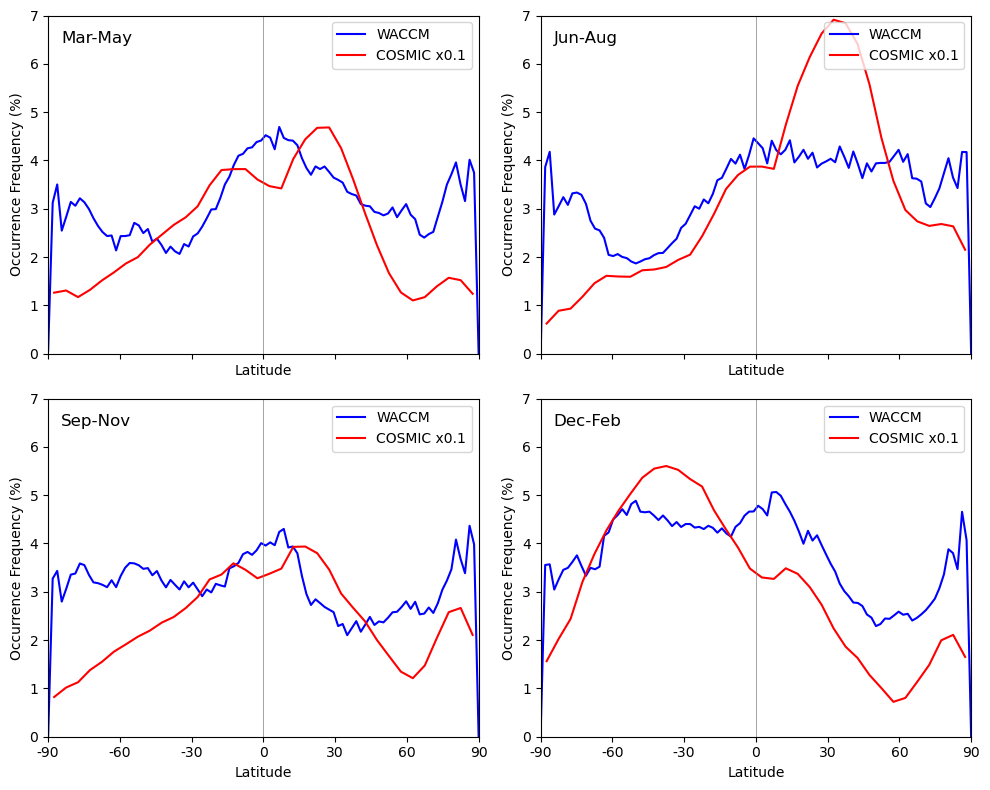

In [16]:
lat_values = np.arange(-90, 95, 5)
lat_bin_edges = lat_values
lat_bin_midpoints = (lat_bin_edges[:-1] + lat_bin_edges[1:]) / 2

factor = 10

# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True)

# Plot WACCM data
axes[0, 0].plot(lat, spr_SpEs_Occ_Fr_b_dsavglevLT, color='blue', label='WACCM')
axes[0, 1].plot(lat, sum_SpEs_Occ_Fr_b_dsavglevLT, color='blue', label='WACCM')
axes[1, 0].plot(lat, aut_SpEs_Occ_Fr_b_dsavglevLT, color='blue', label='WACCM')
axes[1, 1].plot(lat, win_SpEs_Occ_Fr_b_dsavglevLT, color='blue', label='WACCM')


# Plot COSMIC data
axes[0, 0].plot(lat_bin_midpoints, spr_ocfr_LT_lat / factor, color='red', label='COSMIC x0.1')
axes[0, 1].plot(lat_bin_midpoints, sum_ocfr_LT_lat / factor, color='red', label='COSMIC x0.1')
axes[1, 0].plot(lat_bin_midpoints, aut_ocfr_LT_lat / factor, color='red', label='COSMIC x0.1')
axes[1, 1].plot(lat_bin_midpoints, win_ocfr_LT_lat / factor, color='red', label='COSMIC x0.1')

# # Plot COSMIC data magnetic lat lon
# axes[0, 0].plot(lat_bin_midpoints, spr_ocfr_LT_m_lat / factor, color='red', linestyle='dashed', label='COSMIC mag lats x0.1')
# axes[0, 1].plot(lat_bin_midpoints, sum_ocfr_LT_m_lat / factor, color='red', linestyle='dashed', label='COSMIC mag lats x0.1')
# axes[1, 0].plot(lat_bin_midpoints, aut_ocfr_LT_m_lat / factor, color='red', linestyle='dashed', label='COSMIC mag lats x0.1')
# axes[1, 1].plot(lat_bin_midpoints, win_ocfr_LT_m_lat / factor, color='red', linestyle='dashed', label='COSMIC mag lats x0.1')


# Set common labels and legend
for ax in axes.flatten():
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    ax.set_xlim(-90, 90)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Occurrence Frequency (%)')
    ax.set_xticks(np.linspace(-90, 90, 7))
    ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    ax.legend()
    ax.set_ylim(0, 7)

# Add text annotation to the top left
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        label = ['Mar-May', 'Jun-Aug', 'Sep-Nov','Dec-Feb'][i * 2 + j]
        ax.text(0.03, 0.92, label, transform=ax.transAxes, fontsize=12)

# Move the legend to the top right
axes[0, 0].legend(loc='upper right')
axes[0, 1].legend(loc='upper right')
axes[1, 0].legend(loc='upper right')
axes[1, 1].legend(loc='upper right')
        
# Adjust layout
plt.tight_layout()

# Save and show the figure
figname = f'{run_name}_Combined_Lat_s4max_{s4max_threshold}.png'
plt.savefig('./Figures/Combined/' + str(figname), dpi=400, bbox_inches='tight')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


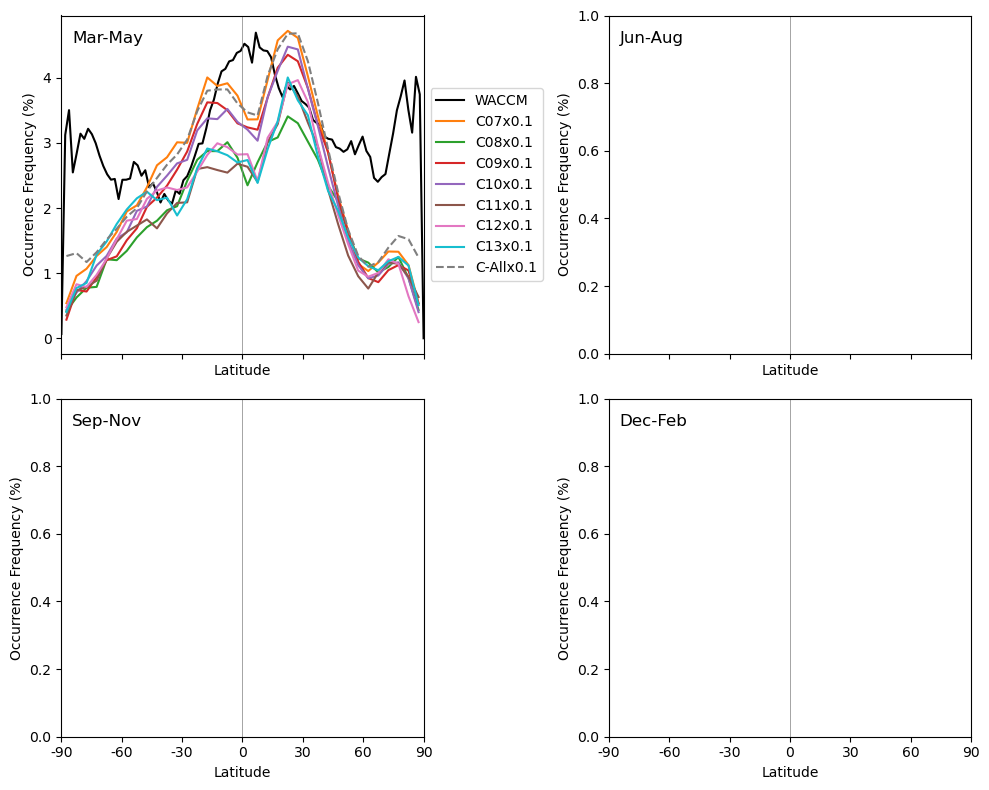

In [41]:
lat_values = np.arange(-90, 95, 5)
lat_bin_edges = lat_values
lat_bin_midpoints = (lat_bin_edges[:-1] + lat_bin_edges[1:]) / 2

factor = 10

# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True)

# Plot WACCM data
axes[0, 0].plot(lat, spr_SpEs_Occ_Fr_b_dsavglevLT, color='black', label='WACCM')
# axes[0, 1].plot(lat, sum_SpEs_Occ_Fr_b_dsavglevLT, color='black', label='WACCM')
# axes[1, 0].plot(lat, aut_SpEs_Occ_Fr_b_dsavglevLT, color='black', label='WACCM')
# axes[1, 1].plot(lat, win_SpEs_Occ_Fr_b_dsavglevLT, color='black', label='WACCM')


# Plot COSMIC data
axes[0, 0].plot(lat_bin_midpoints, spr_ocfr_LT_lat_2007 / factor, color='#ff7f0e', label='C07x0.1')
axes[0, 0].plot(lat_bin_midpoints, spr_ocfr_LT_lat_2008 / factor, color='#2ca02c', label='C08x0.1')
axes[0, 0].plot(lat_bin_midpoints, spr_ocfr_LT_lat_2009 / factor, color='#d62728', label='C09x0.1')
axes[0, 0].plot(lat_bin_midpoints, spr_ocfr_LT_lat_2010 / factor, color='#9467bd', label='C10x0.1')
axes[0, 0].plot(lat_bin_midpoints, spr_ocfr_LT_lat_2011 / factor, color='#8c564b', label='C11x0.1')
axes[0, 0].plot(lat_bin_midpoints, spr_ocfr_LT_lat_2012 / factor, color='#e377c2', label='C12x0.1')
axes[0, 0].plot(lat_bin_midpoints, spr_ocfr_LT_lat_2013 / factor, color='#17becf', label='C13x0.1')

axes[0, 0].plot(lat_bin_midpoints, spr_ocfr_LT_lat / factor, color='#7f7f7f', linestyle='dashed', label='C-Allx0.1')
# axes[0, 1].plot(lat_bin_midpoints, sum_ocfr_LT_lat / factor, color='#7f7f7f', linestyle='dashed', label='C-Allx0.1')
# axes[1, 0].plot(lat_bin_midpoints, aut_ocfr_LT_lat / factor, color='#7f7f7f', linestyle='dashed', label='C-Allx0.1')
# axes[1, 1].plot(lat_bin_midpoints, win_ocfr_LT_lat / factor, color='#7f7f7f', linestyle='dashed', label='C-Allx0.1')




# Set common labels and legend
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
        ax.set_xlim(-90, 90)
        ax.set_xlabel('Latitude')
        ax.set_ylabel('Occurrence Frequency (%)')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))

        # Only add legend to the first subplot
        if i == 0 and j == 0:
            legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
        else:
            ax.legend().set_visible(False)


# Add text annotation to the top left
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        label = ['Mar-May', 'Jun-Aug', 'Sep-Nov','Dec-Feb'][i * 2 + j]
        ax.text(0.03, 0.92, label, transform=ax.transAxes, fontsize=12)

        
# Adjust layout
plt.tight_layout()

# Save and show the figure
figname = f'{run_name}_Combined_Lat_s4max_{s4max_threshold}.png'
#plt.savefig('./Figures/Combined/' + str(figname), dpi=400, bbox_inches='tight')
plt.show()


# 2007: 482048
# 2008: 364922
# 2009: 433731
# 2010: 355202
# 2011: 299451
# 2012: 239559
# 2013: 286458

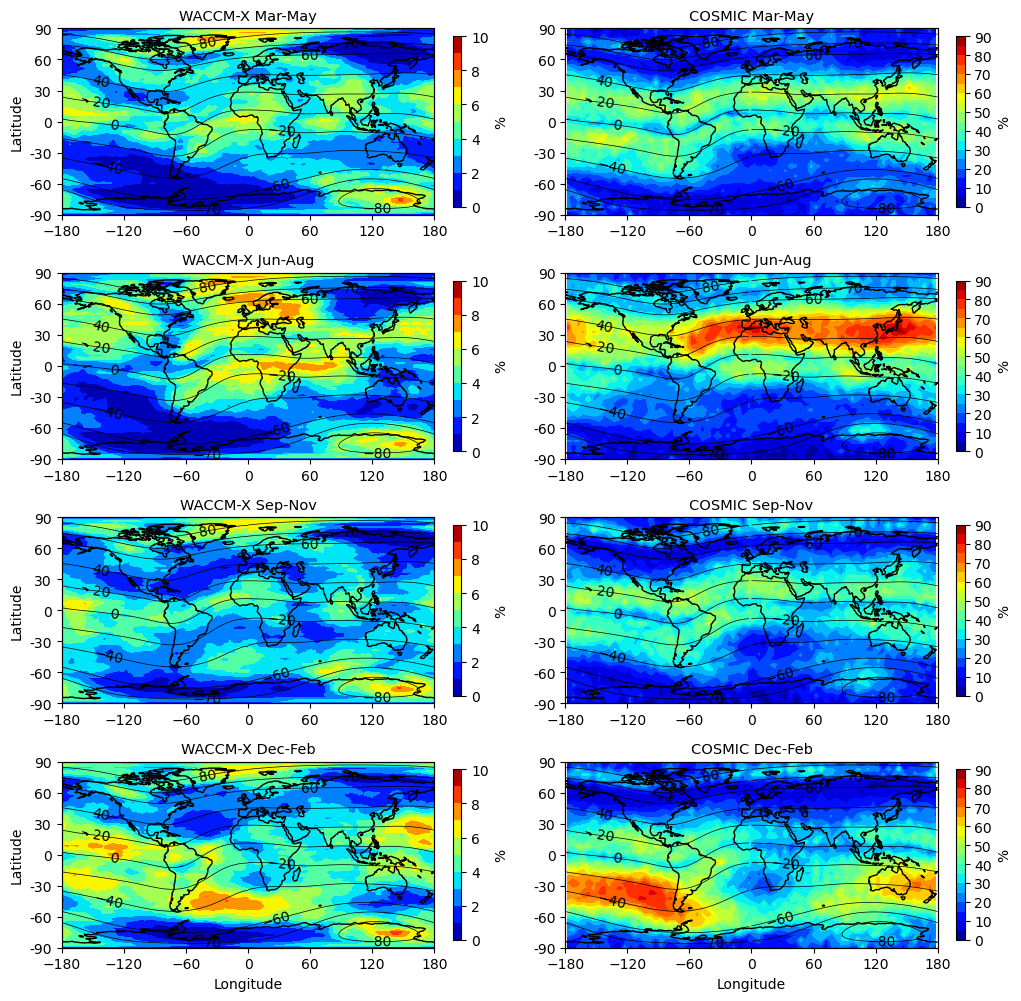

In [27]:
#Lat - Lon

import matplotlib.gridspec as gridspec

#WACCM
# Convert xarray Variable to NumPy array and set last value to 360
lon_plot = lon.values
lon_plot[-1] = 360.


# Create a 4x2 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(11, 11),
                         sharex=True, sharey=True, 
                         subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

# Set common colorbar properties
vminc = 0
vmaxc = 90
cmap = plt.get_cmap('jet')


# Plot WACCM data in the first column
subplots_waccm = [spr_SpEsns_Occ_Fr_dsavglev, sum_SpEsns_Occ_Fr_dsavglev, aut_SpEsns_Occ_Fr_dsavglev, win_SpEsns_Occ_Fr_dsavglev]
titles_waccm = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

vminw = 0
vmaxw = 10

for i, data in enumerate(subplots_waccm):
    row_waccm = i
    col_waccm = 0
    
    ax_waccm = axes[i, 0]

    C = ax_waccm.contourf(lon_plot, lat, data, cmap=cmap,
                    levels=np.linspace(vminw, vmaxw, 11), vmin=vminw, vmax=vmaxw)

    
    if row_waccm == 3:
        ax_waccm.set_xlabel('Longitude')
    if col_waccm == 0:
        ax_waccm.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
 
    ax_waccm.set_ylabel('Latitude')
    ax_waccm.set_yticks(np.linspace(-90, 90, 7))
    ax_waccm.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        


    
    cbar = fig.colorbar(C, ax=ax_waccm, pad=0.04, shrink=0.8)
    cbar.set_label(r'%') 

    ax_waccm.coastlines() 

    #ax.set_title(titles_waccm[i])

    # Add contour lines to each subplot individually
    ax2 = fig.add_subplot(axes[i, 0].get_subplotspec(), projection=ccrs.PlateCarree())

    ax2.set_global()
    contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
    contour = ax2.contour(lon, lat, ALATM[0, :, :],
                          transform=ccrs.PlateCarree(),
                          colors='black',
                          levels=contour_levels, vmin=-90, vmax=90,
                          linestyles='solid',
                          linewidths=0.5
                          )

    ax2.patch.set_facecolor('none')
    clabels = ax2.clabel(contour, inline=True, fontsize=10)
    ax2.set_title(f'WACCM-X {titles_waccm[i]}', fontsize=10.5)



# Plot COSMIC data in the second column
subplots_cosmic = [spr_ocfr_lon_altmean, sum_ocfr_lon_altmean, aut_ocfr_lon_altmean, win_ocfr_lon_altmean]
titles_cosmic = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data in enumerate(subplots_cosmic):
    ax_cosmic = axes[i, 1]
    

    C = ax_cosmic.contourf(spr_lon, spr_lat, data, cmap=cmap,
                    levels=np.linspace(vminc, vmaxc, 19), vmin=vminc, vmax=vmaxc
                   )

    ax_cosmic.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    if i == 3:
        ax_cosmic.set_xlabel('Longitude')
    #if i == 0:
    ax_cosmic.set_yticks(np.linspace(-90, 90, 7))


    cbar = fig.colorbar(C, ax=ax_cosmic, pad=0.04, shrink=0.8)
    cbar.set_label(r'%') 

    ax_cosmic.coastlines() 

    #ax.set_title(titles_cosmic[i])

    # Add contour lines to each subplot individually
    ax2_cosmic = fig.add_subplot(axes[i, 1].get_subplotspec(), projection=ccrs.PlateCarree())

    ax2_cosmic.set_global()
    contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
    contour = ax2_cosmic.contour(ALon, ALat, ALATM[0, :, :],
                          transform=ccrs.PlateCarree(),
                          colors='black',
                          levels=contour_levels, vmin=-90, vmax=90,
                          linestyles='solid',
                          linewidths=0.5
                          )

    ax2_cosmic.patch.set_facecolor('none')
    clabels = ax2_cosmic.clabel(contour, inline=True, fontsize=10)
    ax2_cosmic.set_title(f'COSMIC {titles_cosmic[i]}', fontsize=10.5)




plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# Save the figure
figname = f'{run_name}_Combined_Lat_vs_Lon_s4max_{s4max_threshold}.png'
plt.savefig('./Figures/Combined/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


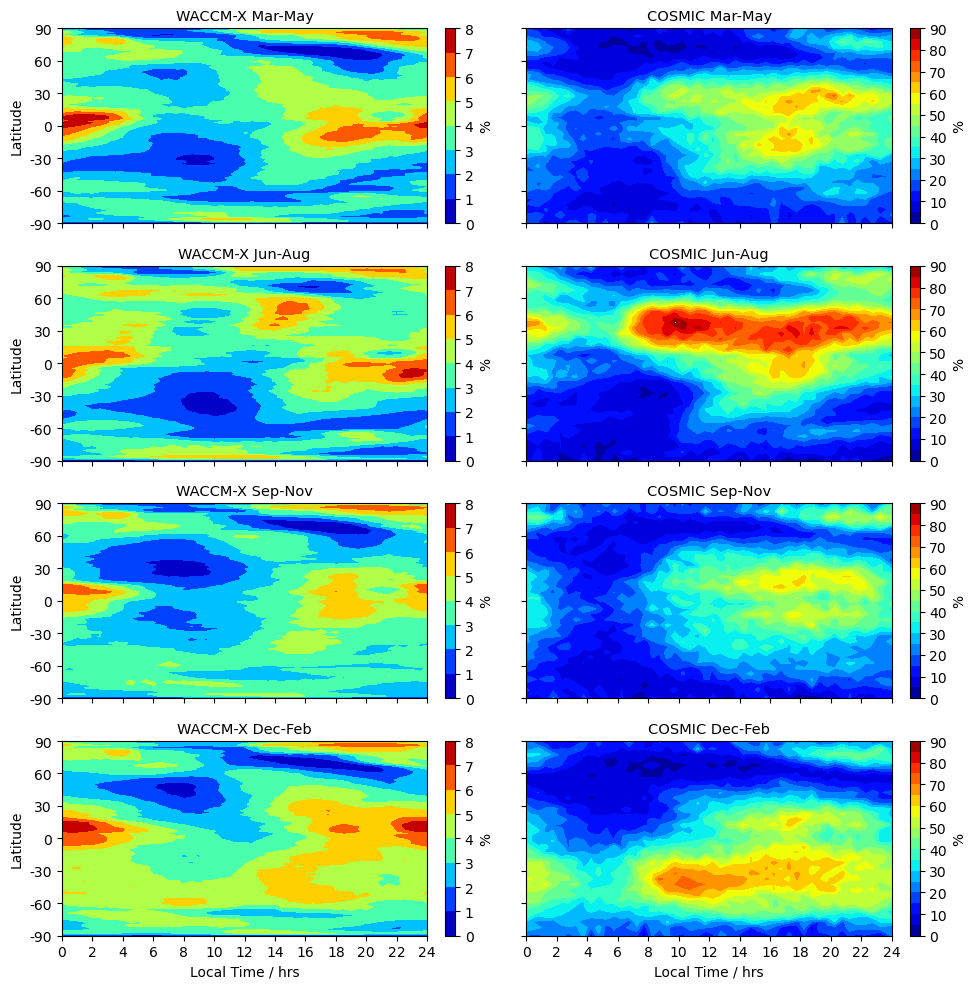

In [70]:
# Lat - LT - all levs


win_SpEs_Occ_Fr_b_dsavglev_plot = win_SpEs_Occ_Fr_b_dsavglev[:,:]  #Whole Dataset avg over all heights ->(96, 48) lat,LT
win_SpEs_Occ_Fr_b_dsavglev_plote = np.concatenate((win_SpEs_Occ_Fr_b_dsavglev_plot, win_SpEs_Occ_Fr_b_dsavglev_plot[:, :1]), axis=1)

spr_SpEs_Occ_Fr_b_dsavglev_plot = spr_SpEs_Occ_Fr_b_dsavglev[:,:]  #Whole Dataset avg over all heights ->(96, 48) lat,LT
spr_SpEs_Occ_Fr_b_dsavglev_plote = np.concatenate((spr_SpEs_Occ_Fr_b_dsavglev_plot, spr_SpEs_Occ_Fr_b_dsavglev_plot[:, :1]), axis=1)

sum_SpEs_Occ_Fr_b_dsavglev_plot = sum_SpEs_Occ_Fr_b_dsavglev[:,:]  #Whole Dataset avg over all heights ->(96, 48) lat,LT
sum_SpEs_Occ_Fr_b_dsavglev_plote = np.concatenate((sum_SpEs_Occ_Fr_b_dsavglev_plot, sum_SpEs_Occ_Fr_b_dsavglev_plot[:, :1]), axis=1)

aut_SpEs_Occ_Fr_b_dsavglev_plot = aut_SpEs_Occ_Fr_b_dsavglev[:,:]  #Whole Dataset avg over all heights ->(96, 48) lat,LT
aut_SpEs_Occ_Fr_b_dsavglev_plote = np.concatenate((aut_SpEs_Occ_Fr_b_dsavglev_plot, aut_SpEs_Occ_Fr_b_dsavglev_plot[:, :1]), axis=1)





# Combine COSMIC and WACCM Latitude - Local Time Plots
fig_combined, axes_combined = plt.subplots(nrows=4, ncols=2, figsize=(10, 10),
                                           sharex=True, sharey=True)

# Set common colorbar properties
vmin_cosmic = 0
vmax_cosmic = 90
cmap_cosmic = plt.get_cmap('jet')

vmin_waccm = 0
vmax_waccm = 8
nolevs_waccm = (vmax_waccm - vmin_waccm ) +1
cmap_waccm = plt.get_cmap('jet')



# WACCM Latitude - Local Time Plots
subplots_waccm = [spr_SpEs_Occ_Fr_b_dsavglev_plote, sum_SpEs_Occ_Fr_b_dsavglev_plote,
                  aut_SpEs_Occ_Fr_b_dsavglev_plote, win_SpEs_Occ_Fr_b_dsavglev_plote]
titles_waccm = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']


for i, data_waccm in enumerate(subplots_waccm):
    row_waccm = i
    col_waccm = 0
    ax_waccm = axes_combined[row_waccm, col_waccm]

    C_waccm = ax_waccm.contourf(timeplot, lat, data_waccm, cmap=jet,
                                levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm),
                                vmin=vmin_waccm, vmax=vmax_waccm)

    if row_waccm == 3:
        ax_waccm.set_xlabel('Local Time / hrs')
    if col_waccm == 0:
        xticks_waccm = np.linspace(0, 24, 13)
        ax_waccm.set_xticks(xticks_waccm)
        ax_waccm.set_xticklabels(xticks_waccm.astype(int))  
    
    ax_waccm.set_ylabel('Latitude')
    ax_waccm.set_yticks(np.linspace(-90, 90, 7))
    ax_waccm.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        
    ax_waccm.set_title(f'WACCM-X {titles_waccm[i]}', fontsize=10.5)


    cbar_waccm = fig_combined.colorbar(C_waccm, ax=ax_waccm, pad=0.04)#, shrink=0.8)
    cbar_waccm.set_label(r'%')

    #ax_waccm.set_title(titles_waccm[i])
    



# COSMIC Latitude - Local Time Plots
subplots_cosmic = [spr_ocfr_LT_altmean, sum_ocfr_LT_altmean, aut_ocfr_LT_altmean, win_ocfr_LT_altmean]
titles_cosmic = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_cosmic in enumerate(subplots_cosmic):
    row_cosmic = i
    col_cosmic = 1
    ax_cosmic = axes_combined[row_cosmic, col_cosmic]

    C_cosmic = ax_cosmic.contourf(spr_local_time_plot, spr_lat, data_cosmic, cmap=jet,
                                  levels=np.linspace(vmin_cosmic, vmax_cosmic, 19),
                                  vmin=vmin_cosmic, vmax=vmax_cosmic)

    if col_cosmic == 0:
        ax_cosmic.set_ylabel('Latitude')
    ax_cosmic.set_yticks(np.linspace(-90, 90, 7))
    ax_cosmic.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))   
    
    if row_cosmic == 3:
        ax_cosmic.set_xlabel('Local Time / hrs')
    xticks_cosmic = np.linspace(0, 24, 13)
    ax_cosmic.set_xticks(xticks_cosmic)
    ax_cosmic.set_xticklabels(xticks_cosmic.astype(int))
    
    ax_cosmic.set_title(f'COSMIC {titles_waccm[i]}', fontsize=10.5)

    cbar_cosmic = fig_combined.colorbar(C_cosmic, ax=ax_cosmic, pad=0.04)#, shrink=0.8)
    cbar_cosmic.set_label(r'%')

    #ax_cosmic.set_title(titles_cosmic[i])


    

plt.tight_layout()#rect=[0.05, 0.03, 1, 0.95])

# Save the combined figure
figname_combined = f'{run_name}_Combined_Lat_vs_LT_s4max_{s4max_threshold}.png'
plt.savefig('./Figures/Combined/' + str(figname_combined), dpi=400, bbox_inches='tight')

plt.show()


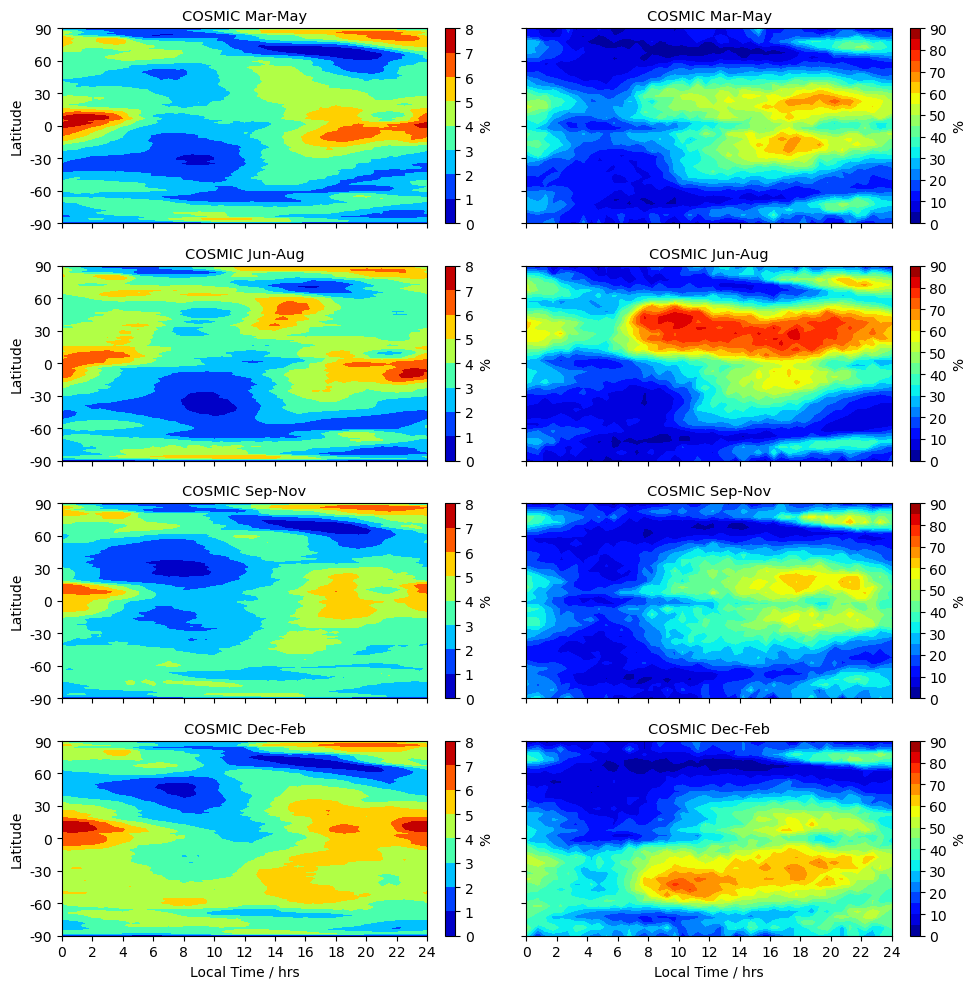

In [71]:
############ M A G N E T I C   L A T #################
# CURRENTLY ONLY COSMIC DATA ShOWING MAG LAT

# Lat - LT - all levs


win_SpEs_Occ_Fr_b_dsavglev_plot = win_SpEs_Occ_Fr_b_dsavglev[:,:]  #Whole Dataset avg over all heights ->(96, 48) lat,LT
win_SpEs_Occ_Fr_b_dsavglev_plote = np.concatenate((win_SpEs_Occ_Fr_b_dsavglev_plot, win_SpEs_Occ_Fr_b_dsavglev_plot[:, :1]), axis=1)

spr_SpEs_Occ_Fr_b_dsavglev_plot = spr_SpEs_Occ_Fr_b_dsavglev[:,:]  #Whole Dataset avg over all heights ->(96, 48) lat,LT
spr_SpEs_Occ_Fr_b_dsavglev_plote = np.concatenate((spr_SpEs_Occ_Fr_b_dsavglev_plot, spr_SpEs_Occ_Fr_b_dsavglev_plot[:, :1]), axis=1)

sum_SpEs_Occ_Fr_b_dsavglev_plot = sum_SpEs_Occ_Fr_b_dsavglev[:,:]  #Whole Dataset avg over all heights ->(96, 48) lat,LT
sum_SpEs_Occ_Fr_b_dsavglev_plote = np.concatenate((sum_SpEs_Occ_Fr_b_dsavglev_plot, sum_SpEs_Occ_Fr_b_dsavglev_plot[:, :1]), axis=1)

aut_SpEs_Occ_Fr_b_dsavglev_plot = aut_SpEs_Occ_Fr_b_dsavglev[:,:]  #Whole Dataset avg over all heights ->(96, 48) lat,LT
aut_SpEs_Occ_Fr_b_dsavglev_plote = np.concatenate((aut_SpEs_Occ_Fr_b_dsavglev_plot, aut_SpEs_Occ_Fr_b_dsavglev_plot[:, :1]), axis=1)





# Combine COSMIC and WACCM Latitude - Local Time Plots
fig_combined, axes_combined = plt.subplots(nrows=4, ncols=2, figsize=(10, 10),
                                           sharex=True, sharey=True)

# Set common colorbar properties
vmin_cosmic = 0
vmax_cosmic = 90
cmap_cosmic = plt.get_cmap('jet')

vmin_waccm = 0
vmax_waccm = 8
nolevs_waccm = (vmax_waccm - vmin_waccm ) +1
cmap_waccm = plt.get_cmap('jet')



# WACCM Latitude - Local Time Plots
subplots_waccm = [spr_SpEs_Occ_Fr_b_dsavglev_plote, sum_SpEs_Occ_Fr_b_dsavglev_plote,
                  aut_SpEs_Occ_Fr_b_dsavglev_plote, win_SpEs_Occ_Fr_b_dsavglev_plote]
titles_waccm = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']


for i, data_waccm in enumerate(subplots_waccm):
    row_waccm = i
    col_waccm = 0
    ax_waccm = axes_combined[row_waccm, col_waccm]

    C_waccm = ax_waccm.contourf(timeplot, lat, data_waccm, cmap=jet,
                                levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm),
                                vmin=vmin_waccm, vmax=vmax_waccm)

    if row_waccm == 3:
        ax_waccm.set_xlabel('Local Time / hrs')
    if col_waccm == 0:
        xticks_waccm = np.linspace(0, 24, 13)
        ax_waccm.set_xticks(xticks_waccm)
        ax_waccm.set_xticklabels(xticks_waccm.astype(int))  
    
    ax_waccm.set_ylabel('Latitude')
    ax_waccm.set_yticks(np.linspace(-90, 90, 7))
    ax_waccm.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        
    ax_waccm.set_title(f'COSMIC {titles_waccm[i]}', fontsize=10.5)


    cbar_waccm = fig_combined.colorbar(C_waccm, ax=ax_waccm, pad=0.04)#, shrink=0.8)
    cbar_waccm.set_label(r'%')

    #ax_waccm.set_title(titles_waccm[i])
    



# COSMIC Latitude - Local Time Plots
subplots_cosmic = [spr_ocfr_LT_m_altmean, sum_ocfr_LT_m_altmean, aut_ocfr_LT_m_altmean, win_ocfr_LT_m_altmean]
titles_cosmic = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_cosmic in enumerate(subplots_cosmic):
    row_cosmic = i
    col_cosmic = 1
    ax_cosmic = axes_combined[row_cosmic, col_cosmic]

    C_cosmic = ax_cosmic.contourf(spr_local_time_plot, spr_mlat, data_cosmic, cmap=jet,
                                  levels=np.linspace(vmin_cosmic, vmax_cosmic, 19),
                                  vmin=vmin_cosmic, vmax=vmax_cosmic)

    if col_cosmic == 0:
        ax_cosmic.set_ylabel('Magnetic Latitude')
    ax_cosmic.set_yticks(np.linspace(-90, 90, 7))
    ax_cosmic.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))   
    
    if row_cosmic == 3:
        ax_cosmic.set_xlabel('Local Time / hrs')
    xticks_cosmic = np.linspace(0, 24, 13)
    ax_cosmic.set_xticks(xticks_cosmic)
    ax_cosmic.set_xticklabels(xticks_cosmic.astype(int))
    
    ax_cosmic.set_title(f'COSMIC {titles_waccm[i]}', fontsize=10.5)

    cbar_cosmic = fig_combined.colorbar(C_cosmic, ax=ax_cosmic, pad=0.04)#, shrink=0.8)
    cbar_cosmic.set_label(r'%')

    #ax_cosmic.set_title(titles_cosmic[i])


    

plt.tight_layout()#rect=[0.05, 0.03, 1, 0.95])

# Save the combined figure
figname_combined = f'{run_name}_Combined_Mag_Lat_vs_LT_s4max_{s4max_threshold}.png'
plt.savefig('./Figures/Combined/' + str(figname_combined), dpi=400, bbox_inches='tight')

plt.show()


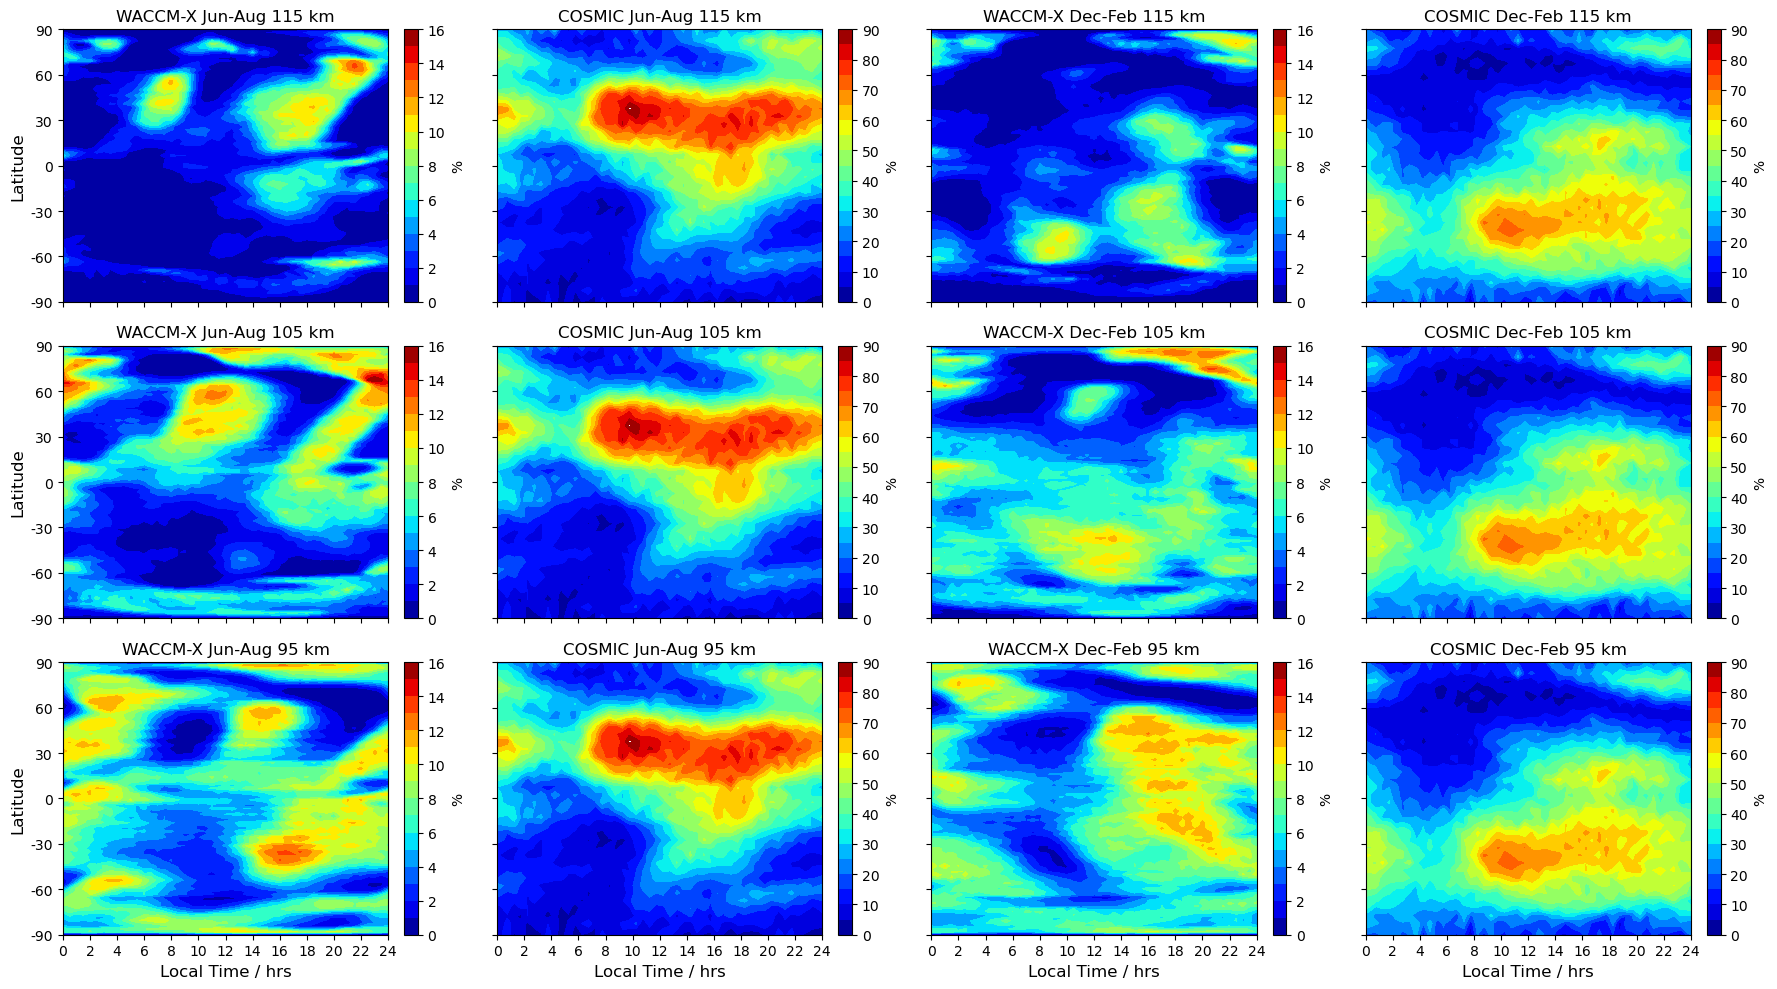

In [76]:
# Lat - LT - specific alt - SUMMER AND WINTER

plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low

indices = np.argmin(np.abs(Zavg_sl.values - np.array(plot_alts)[:, None]), axis=1)





# Combine COSMIC and WACCM Latitude - Local Time Plots
fig_combined, axes_combined = plt.subplots(nrows=3, ncols=4, figsize=(18, 10),
                                           sharex=True, sharey=True)

# Set common colorbar properties
vmin_cosmic = 0
vmax_cosmic = 90
cmap_cosmic = plt.get_cmap('jet')

vmin_waccm = 0
vmax_waccm = 16
nolevs_waccm = (vmax_waccm - vmin_waccm )+ 1 
cmap_waccm = plt.get_cmap('jet')

# Iterate over altitudes
for i, ialt in enumerate(plot_alts):
    altindex = indices[i]

    win_SpEs_Occ_Fr_b_dsavg_plot = win_SpEs_Occ_Fr_b_dsavg[altindex, :, :]
    win_SpEs_Occ_Fr_b_dsavg_plote = np.concatenate((win_SpEs_Occ_Fr_b_dsavg_plot, win_SpEs_Occ_Fr_b_dsavg_plot[:, :1]),
                                                    axis=1)

    sum_SpEs_Occ_Fr_b_dsavg_plot = sum_SpEs_Occ_Fr_b_dsavg[altindex, :, :]
    sum_SpEs_Occ_Fr_b_dsavg_plote = np.concatenate((sum_SpEs_Occ_Fr_b_dsavg_plot, sum_SpEs_Occ_Fr_b_dsavg_plot[:, :1]),
                                                    axis=1)

    # WACCM Latitude - Local Time Plots
    subplots_waccm = [sum_SpEs_Occ_Fr_b_dsavg_plote, win_SpEs_Occ_Fr_b_dsavg_plote]
    titles_waccm = ['Jun-Aug', 'Dec-Feb']
    titl = 'sum-win'


    for j, data_waccm in enumerate(subplots_waccm):
        row_waccm = i
        col_waccm = j * 2  # Adjust column index
        ax_waccm = axes_combined[row_waccm, col_waccm]

        C_waccm = ax_waccm.contourf(timeplot, lat, data_waccm, cmap=cmap_waccm,
                                    levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm),
                                    vmin=vmin_waccm, vmax=vmax_waccm)

        # Set labels and ticks
        if row_waccm == 2:
            ax_waccm.set_xlabel('Local Time / hrs',fontsize=12)
        if col_waccm == 0:
            ax_waccm.set_ylabel('Latitude',fontsize=12)
            ax_waccm.set_yticks(np.linspace(-90, 90, 7))
            ax_waccm.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        xticks_waccm = np.linspace(0, 24, 13)
        ax_waccm.set_xticks(xticks_waccm)
        ax_waccm.set_xticklabels(xticks_waccm.astype(int))
        ax_waccm.set_title(f'WACCM-X {titles_waccm[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_waccm = fig_combined.colorbar(C_waccm, ax=ax_waccm, pad=0.04)
        cbar_waccm.set_label(r'%')
        

        
    # COSMIC Latitude - Local Time Plots
    subplots_cosmic = [sum_ocfr_LT_altmean, win_ocfr_LT_altmean]
    titles_cosmic = ['Jun-Aug', 'Dec-Feb']

    for j, data_cosmic in enumerate(subplots_cosmic):
        row_cosmic = i
        col_cosmic = j * 2 + 1  # Adjust column index
        ax_cosmic = axes_combined[row_cosmic, col_cosmic]

        C_cosmic = ax_cosmic.contourf(spr_local_time_plot, spr_lat, data_cosmic, cmap=cmap_cosmic,
                                      levels=np.linspace(vmin_cosmic, vmax_cosmic, 19),
                                      vmin=vmin_cosmic, vmax=vmax_cosmic)

        # Set labels and ticks
        if col_cosmic == 1:
            #ax_cosmic.set_ylabel('Latitude')
            ax_cosmic.set_yticks(np.linspace(-90, 90, 7))
            ax_cosmic.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        if row_cosmic == 2:
            ax_cosmic.set_xlabel('Local Time / hrs',fontsize=12)
        xticks_cosmic = np.linspace(0, 24, 13)
        ax_cosmic.set_xticks(xticks_cosmic)
        ax_cosmic.set_xticklabels(xticks_cosmic.astype(int))
        ax_cosmic.set_title(f'COSMIC {titles_waccm[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_cosmic = fig_combined.colorbar(C_cosmic, ax=ax_cosmic, pad=0.04)
        cbar_cosmic.set_label(r'%')






plt.tight_layout()

# Save the combined figure
figname_combined = f'{run_name}_Combined_Lat_vs_LT_{titl}_s4max_{s4max_threshold}.png'
plt.savefig('./Figures/Combined/' + str(figname_combined), dpi=400, bbox_inches='tight')

plt.show()


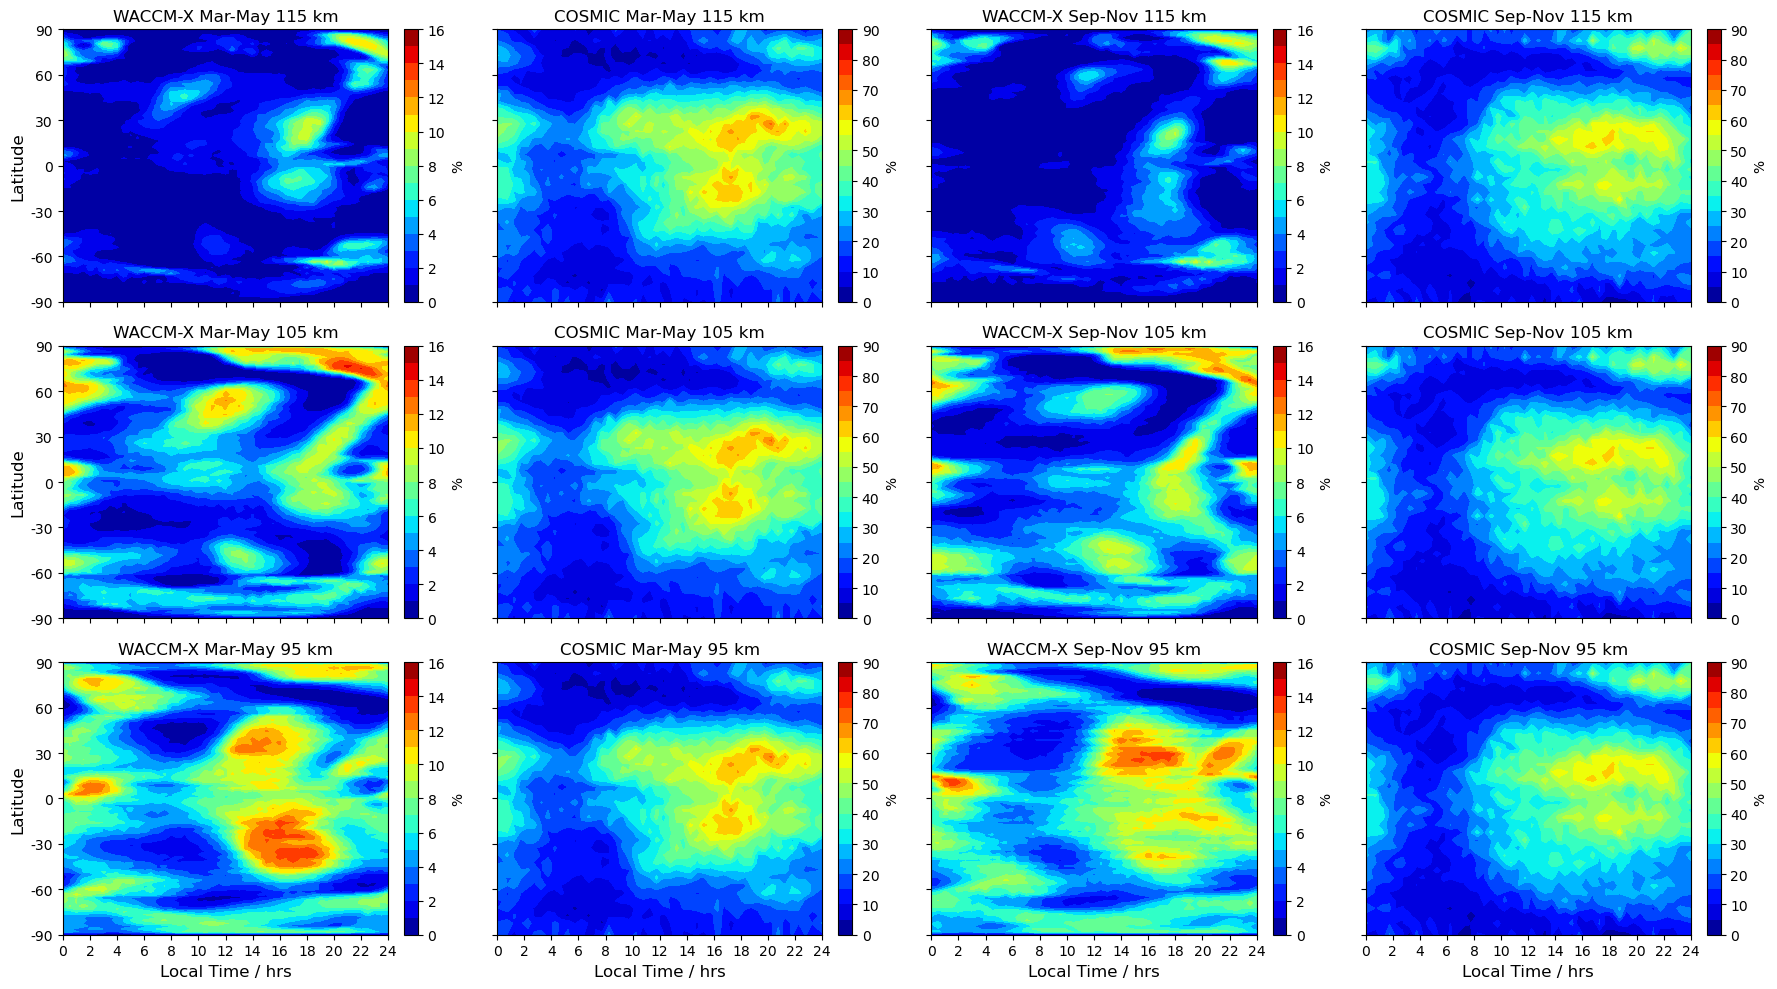

In [75]:
# Lat - LT - specific alt - SPRING AND AUTUMN

plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low

indices = np.argmin(np.abs(Zavg_sl.values - np.array(plot_alts)[:, None]), axis=1)





# Combine COSMIC and WACCM Latitude - Local Time Plots
fig_combined, axes_combined = plt.subplots(nrows=3, ncols=4, figsize=(18,10),    #16, 10),
                                           sharex=True, sharey=True)

# Set common colorbar properties
vmin_cosmic = 0
vmax_cosmic = 90
cmap_cosmic = plt.get_cmap('jet')

vmin_waccm = 0
vmax_waccm = 16
nolevs_waccm = (vmax_waccm - vmin_waccm )+ 1 
cmap_waccm = plt.get_cmap('jet')

# Iterate over altitudes
for i, ialt in enumerate(plot_alts):
    altindex = indices[i]

    spr_SpEs_Occ_Fr_b_dsavg_plot = spr_SpEs_Occ_Fr_b_dsavg[altindex, :, :]
    spr_SpEs_Occ_Fr_b_dsavg_plote = np.concatenate((spr_SpEs_Occ_Fr_b_dsavg_plot, spr_SpEs_Occ_Fr_b_dsavg_plot[:, :1]),
                                                    axis=1)

    aut_SpEs_Occ_Fr_b_dsavg_plot = aut_SpEs_Occ_Fr_b_dsavg[altindex, :, :]
    aut_SpEs_Occ_Fr_b_dsavg_plote = np.concatenate((aut_SpEs_Occ_Fr_b_dsavg_plot, aut_SpEs_Occ_Fr_b_dsavg_plot[:, :1]),
                                                    axis=1)

    # WACCM Latitude - Local Time Plots
    subplots_waccm = [spr_SpEs_Occ_Fr_b_dsavg_plote, aut_SpEs_Occ_Fr_b_dsavg_plote]
    titles_waccm = ['Mar-May', 'Sep-Nov']
    titl = 'spr-aut'


    for j, data_waccm in enumerate(subplots_waccm):
        row_waccm = i
        col_waccm = j * 2  # Adjust column index
        ax_waccm = axes_combined[row_waccm, col_waccm]

        C_waccm = ax_waccm.contourf(timeplot, lat, data_waccm, cmap=cmap_waccm,
                                    levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm),
                                    vmin=vmin_waccm, vmax=vmax_waccm)

        # Set labels and ticks
        if row_waccm == 2:
            ax_waccm.set_xlabel('Local Time / hrs',fontsize=12)
        if col_waccm == 0:
            ax_waccm.set_ylabel('Latitude',fontsize=12)
            ax_waccm.set_yticks(np.linspace(-90, 90, 7))
            ax_waccm.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        xticks_waccm = np.linspace(0, 24, 13)
        ax_waccm.set_xticks(xticks_waccm)
        ax_waccm.set_xticklabels(xticks_waccm.astype(int))
        ax_waccm.set_title(f'WACCM-X {titles_waccm[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_waccm = fig_combined.colorbar(C_waccm, ax=ax_waccm, pad=0.04)
        cbar_waccm.set_label(r'%')
        

        
    # COSMIC Latitude - Local Time Plots
    subplots_cosmic = [spr_ocfr_LT_altmean, aut_ocfr_LT_altmean]
    titles_cosmic = ['Mar-May', 'Sep-Nov']

    for j, data_cosmic in enumerate(subplots_cosmic):
        row_cosmic = i
        col_cosmic = j * 2 + 1  # Adjust column index
        ax_cosmic = axes_combined[row_cosmic, col_cosmic]

        C_cosmic = ax_cosmic.contourf(spr_local_time_plot, spr_lat, data_cosmic, cmap=cmap_cosmic,
                                      levels=np.linspace(vmin_cosmic, vmax_cosmic, 19),
                                      vmin=vmin_cosmic, vmax=vmax_cosmic)

        # Set labels and ticks
        if col_cosmic == 1:
            #ax_cosmic.set_ylabel('Latitude')
            ax_cosmic.set_yticks(np.linspace(-90, 90, 7))
            ax_cosmic.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        if row_cosmic == 2:
            ax_cosmic.set_xlabel('Local Time / hrs',fontsize=12)
        xticks_cosmic = np.linspace(0, 24, 13)
        ax_cosmic.set_xticks(xticks_cosmic)
        ax_cosmic.set_xticklabels(xticks_cosmic.astype(int))
        ax_cosmic.set_title(f'COSMIC {titles_waccm[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_cosmic = fig_combined.colorbar(C_cosmic, ax=ax_cosmic, pad=0.04)
        cbar_cosmic.set_label(r'%')






plt.tight_layout()

# Save the combined figure
figname_combined = f'{run_name}_Combined_Lat_vs_LT_{titl}_s4max_{s4max_threshold}.png'
plt.savefig('./Figures/Combined/' + str(figname_combined), dpi=400, bbox_inches='tight')

plt.show()


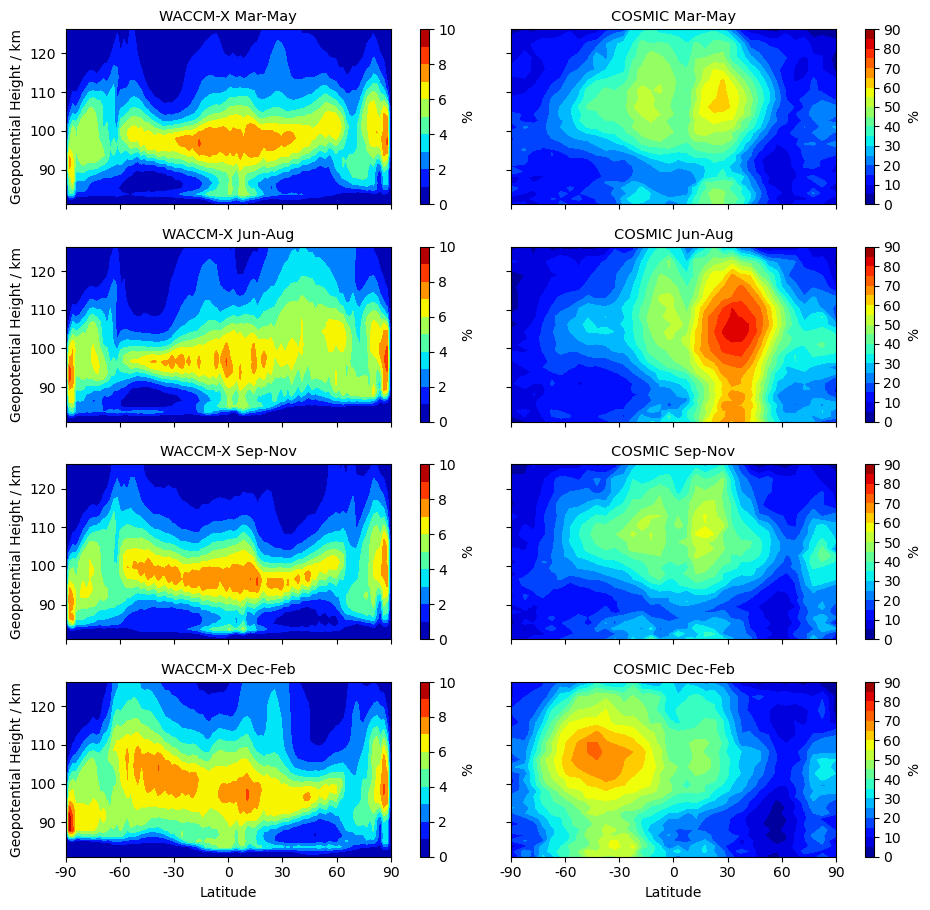

In [77]:
#Alt - Lat


import matplotlib.pyplot as plt
import numpy as np

# Define common parameters
vmin_cosmic = 0
vmax_cosmic = 90
vmin_waccm = 0
vmax_waccm = 10
cmap = plt.get_cmap('jet')

# Create a 4x2 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharex=True, sharey=True)



# Plot WACCM data on the left
subplots_waccm = [spr_SpEs_Occ_Fr_b_dsavgLT, sum_SpEs_Occ_Fr_b_dsavgLT, aut_SpEs_Occ_Fr_b_dsavgLT, win_SpEs_Occ_Fr_b_dsavgLT]
titles_waccm = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_waccm in enumerate(subplots_waccm):
    ax = axes[i, 0]

    C = ax.contourf(lat, Zavg_sl, data_waccm, cmap=cmap, levels=np.linspace(vmin_waccm, vmax_waccm, 11),
                    vmin=vmin_waccm, vmax=vmax_waccm)

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  # Remove xticks for intermediate WACCM plots

    ax.set_ylabel('Geopotential Height / km')


    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'%')

    ax.set_title(f'WACCM-X {titles_waccm[i]}', fontsize=10.5)
    
    
# Plot COSMIC data on the right
subplots_cosmic = [spr_ocfr_LT_LTmean, sum_ocfr_LT_LTmean, aut_ocfr_LT_LTmean, win_ocfr_LT_LTmean]
titles_cosmic = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_cosmic in enumerate(subplots_cosmic):
    ax = axes[i, 1]

    C = ax.contourf(spr_lat_plot, spr_alt, data_cosmic, cmap=cmap,
                    levels=np.linspace(vmin_cosmic, vmax_cosmic, 19), vmin=vmin_cosmic, vmax=vmax_cosmic)

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  # Remove xticks for intermediate COSMIC plots

    ax.set_ylim(spr_alt.min(), spr_alt.max())

    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'%')

    ax.set_title(f'COSMIC {titles_cosmic[i]}', fontsize=10.5)

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# Save the figure
figname = f'{run_name}_Combined_Alt_vs_Lat_s4max_{s4max_threshold}.png'
plt.savefig('./Figures/Combined/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


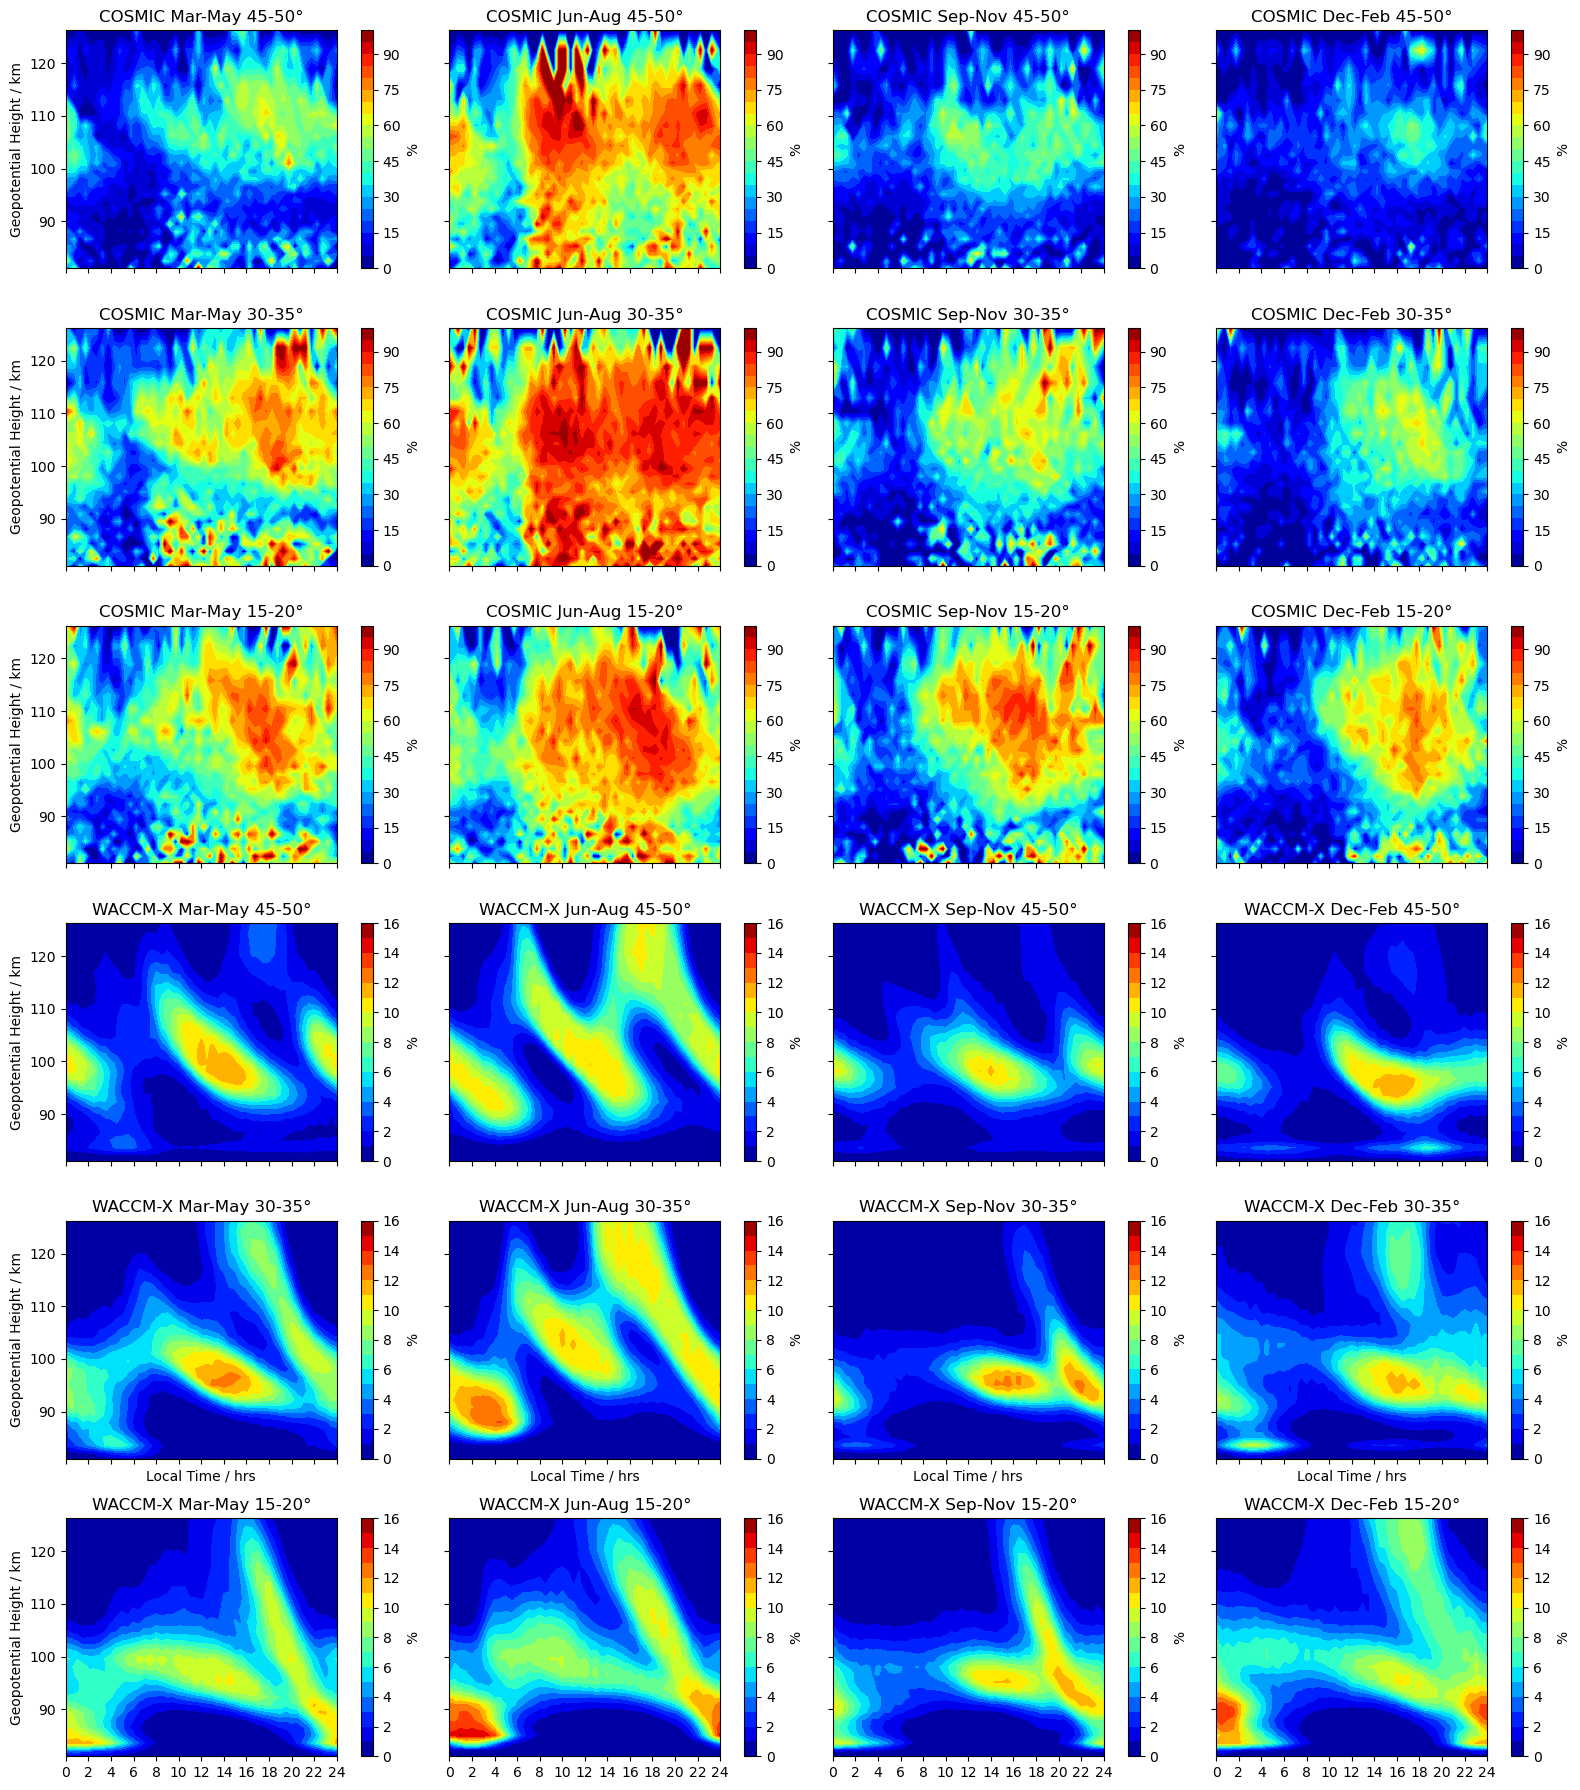

In [78]:
# Alt - LT


###------------------------### C O S M I C ###------------------------###

#Alt-LT plots, individual Lat slices

# Define the latitude slices
#latitude_slices = [(10, 15), (20, 25), (30, 35), (40, 45), (50, 55)]
latitude_slices = [(15, 20) , (30, 35), (45, 50) ]
lenlat = len(latitude_slices)

# # Calculate the number of latitude slices
# nlatsl = len(latitude_slices)
# # Extract min and max values from the latitude slices
# latslmin = min(min(lat_min, lat_max) for lat_min, lat_max in latitude_slices)
# latslmax = max(max(lat_min, lat_max) for lat_min, lat_max in latitude_slices)


# Create new variables for each season and latitude slice
spr_ocfr_LT_latsl = {}
sum_ocfr_LT_latsl = {}
aut_ocfr_LT_latsl = {}
win_ocfr_LT_latsl = {}

# Loop through each latitude slice
for lat_slice in latitude_slices:
    lower_lat, upper_lat = lat_slice
    
    # Slice the data for the current latitude slice
    spr_slice = spr_ocfr_LT.sel(latitude=slice(lower_lat, upper_lat))
    sum_slice = sum_ocfr_LT.sel(latitude=slice(lower_lat, upper_lat))
    aut_slice = aut_ocfr_LT.sel(latitude=slice(lower_lat, upper_lat))
    win_slice = win_ocfr_LT.sel(latitude=slice(lower_lat, upper_lat))
    
    # Calculate the mean along the 'latitude' dimension
    spr_latslmean = spr_slice.mean(dim='latitude')
    sum_latslmean = sum_slice.mean(dim='latitude')
    aut_latslmean = aut_slice.mean(dim='latitude')
    win_latslmean = win_slice.mean(dim='latitude')
    
    # Store the results in dictionaries
    spr_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}'] = spr_latslmean
    sum_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}'] = sum_latslmean
    aut_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}'] = aut_latslmean
    win_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}'] = win_latslmean

###------------------------### W A C C M ###------------------------###

# Assuming intlat is your xarray IndexVariable
ind_15_20 = np.where((intlat >= 15.0) & (intlat <= 20.0))[0]
ind_45_50 = np.where((intlat >= 45.0) & (intlat <= 50.0))[0]

###------------------------### W A C C M ###------------------------###


# Define the seasons and titles
seasons = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']
lenseas = len(seasons)

#set common colorbar properties
vmin_waccm = 0
vmax_waccm = 16
nolevs_waccm = 17

vmin_cosmic = 0
vmax_cosmic = 100
cmap = plt.get_cmap('jet')


# Create a 4x4 subplot grid
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=( (4*lenseas), (4*1.5*lenlat) ), sharex=True, sharey=True)


#################################### COSMIC PLOTS ######################################   
for i_season, season in enumerate(seasons):
    for i_lat_band, (lower_lat, upper_lat) in enumerate(latitude_slices[::-1]):
        
        if i_lat_band < lenlat:
            # Extract data for the top rows
            if season.lower() == 'mar-may':
                data = spr_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}']
            elif season.lower() == 'jun-aug':
                data = sum_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}']
            elif season.lower() == 'sep-nov':
                data = aut_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}']
            elif season.lower() == 'dec-feb':
                data = win_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}']

        # Create subplots for each season and latitude band
        ax = axes[i_lat_band, i_season]

        if i_lat_band < lenlat: 
            contour = ax.contourf(spr_local_time_plot, spr_alt, data, cmap='jet',
                                  levels=np.linspace(vmin_cosmic, vmax_cosmic, 21),
                                  vmin=vmin_cosmic, vmax=vmax_cosmic)

        cbar = fig.colorbar(contour, ax=ax, pad=0.07)
        cbar.set_label(r'%')
        ax.set_title(f'COSMIC {season} {lower_lat}-{upper_lat}\u00b0')
        
        if i_season == 0:
            ax.set_ylabel('Geopotential Height / km')
            
#################################### WACCM PLOTS ######################################            
for i_season, season in enumerate(seasons):
    for i_lat_band, (lower_lat, upper_lat) in enumerate(latitude_slices[::-1]):
        
        i_lat_ind = i_lat_band + lenlat
        
        intlat_ind = np.where((intlat >= lower_lat) & (intlat <= upper_lat))[0]
        
        if i_lat_ind > (lenlat-1):
            if season.lower() == 'mar-may':
                data_waccm = spr_SpEs_Occ_Fr_bb_5d_dsavg[:, intlat_ind, :]
                data_waccm = np.squeeze(data_waccm)
                datac_waccm = np.concatenate((data_waccm, data_waccm[:, :1]), axis=1)
            elif season.lower() == 'jun-aug':
                data_waccm = sum_SpEs_Occ_Fr_bb_5d_dsavg[:, intlat_ind, :]
                data_waccm = np.squeeze(data_waccm)
                datac_waccm = np.concatenate((data_waccm, data_waccm[:, :1]), axis=1)
            elif season.lower() == 'sep-nov':
                data_waccm = aut_SpEs_Occ_Fr_bb_5d_dsavg[:, intlat_ind, :]
                data_waccm = np.squeeze(data_waccm)
                datac_waccm = np.concatenate((data_waccm, data_waccm[:, :1]), axis=1)
            elif season.lower() == 'dec-feb':
                data_waccm = win_SpEs_Occ_Fr_bb_5d_dsavg[:, intlat_ind, :]
                data_waccm = np.squeeze(data_waccm)
                datac_waccm = np.concatenate((data_waccm, data_waccm[:, :1]), axis=1)
  
        ax = axes[i_lat_ind, i_season]

        #if i_lat_ind > 1:
        contour = ax.contourf(timeplot, Zavg_sl, datac_waccm, cmap=cmap, 
                              levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm), #extend='max', 
                              vmin=vmin_waccm, vmax=vmax_waccm)
            
               
                
        if i_lat_band == 1:
            ax.set_xlabel('Local Time / hrs')
        xticks = np.linspace(0, 24, 13)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks.astype(int))
        ax.set_title(f'WACCM-X {season} {lower_lat}-{upper_lat}\u00b0')

        cbar = fig.colorbar(contour, ax=ax, pad=0.07)
        cbar.set_label(r'%')
        
        ax.set_ylim(spr_alt.min(), spr_alt.max())
        
        if i_season == 0:
            ax.set_ylabel('Geopotential Height / km')
    
#################################### WACCM PLOTS ######################################

plt.tight_layout()

# Save the figure
figname = f'{run_name}_Combined_Alt_vs_LT_s4max_{s4max_threshold}.png'
plt.savefig('./Figures/Combined/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()